In [20]:
import random
import matplotlib.pyplot as plt

# Trabajo Práctico 1

## Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de
1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [7]:
semilla = (99732 + 100687 + 99627 + 98625)//4

In [23]:
def gcl(estado_inicial):
    nuevo_estado = (1013904223 * estado_inicial + 1664525) % 2**32
    return nuevo_estado, nuevo_estado

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [24]:
def gcl_reduce(estado_inicial):
    nuevo_estado, semilla_nueva = gcl(estado_inicial)
    return nuevo_estado/2**32, semilla_nueva

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

In [25]:
def numeros_random(muestra, generador, semilla):
    estado_actual = semilla
    resultado = []
    for i in range(muestra):
        numero_random, estado_actual = generador(estado_actual)
        resultado.append(numero_random)
    return resultado

In [29]:
muestra = 50000
resultado_gcl = numeros_random(muestra, gcl, semilla)
resultado_gcl_reduce = numeros_random(muestra, gcl_reduce, semilla)

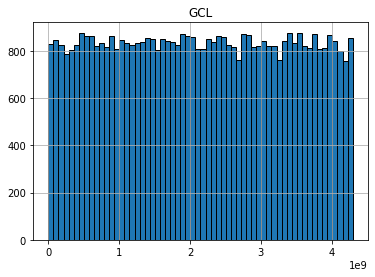

<Figure size 432x288 with 0 Axes>

In [30]:
plt.title('GCL')
plt.hist(resultado_gcl, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

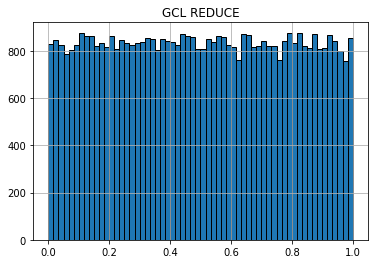

<Figure size 432x288 with 0 Axes>

In [31]:
plt.title('GCL REDUCE')
plt.hist(resultado_gcl_reduce, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

```
𝑥𝑖+1 = ( 𝑥𝑖−24 + 𝑥𝑖−55) 𝑚𝑜𝑑 2^24
Donde 𝑥0,𝑥1, … , 𝑥54 son números arbitrarios no todos iguales.
```

In [36]:
def gen_mm(estados_previos):
    i = len(estados_previos)
    nuevo_estado = (estados_previos[i-24] + estados_previos[i-55])% 2**24
    estados_previos.append(nuevo_estado)
    return nuevo_estado, estados_previos

In [37]:
estados_iniciales = numeros_random(55, gcl, semilla)
resultado_gen_mm = numeros_random(1000, gen_mm, estados_iniciales)

In [38]:
resultado_gen_mm

[9857069,
 3943373,
 3187757,
 7106509,
 10870829,
 14791629,
 11934765,
 14415821,
 2185261,
 10173389,
 10982445,
 6258637,
 577581,
 6865869,
 330797,
 16189389,
 6047789,
 4869069,
 13534253,
 10653645,
 1818669,
 4182989,
 261165,
 6428621,
 5584263,
 12334144,
 3954151,
 8148960,
 1732167,
 4883328,
 12943015,
 9484064,
 9668359,
 3732160,
 5932903,
 11351648,
 7372743,
 14123520,
 11235367,
 2217376,
 6379655,
 7745856,
 6830311,
 4101344,
 1446215,
 6619264,
 4252071,
 5469216,
 5023585,
 6735923,
 8145953,
 16198515,
 13033697,
 5676723,
 1598881,
 2563917,
 13611732,
 6919917,
 13039412,
 5445261,
 5387156,
 9281069,
 8873972,
 4402637,
 16553044,
 1951085,
 13088948,
 4678925,
 8312084,
 6950061,
 3664244,
 11517005,
 9892654,
 3492960,
 2022382,
 1239968,
 439470,
 5937888,
 8027502,
 8148180,
 9168660,
 10874068,
 4411156,
 7177428,
 10270484,
 5446868,
 1580820,
 14070996,
 3507988,
 7883988,
 7663380,
 12051668,
 5658388,
 1408212,
 5881620,
 1119444,
 861294,
 10323271,